In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [85]:
import pandas as pd
import statsmodels.api as sm

# 讀取 Excel 檔案
file_path = "/Users/xinc./Documents/GitHub/desktop-tutorial/Book1.xlsx"
df = pd.read_excel(file_path)

# 檢查缺失值並移除
df.dropna(subset=['Price', 'Two-days', 'West_side', 'Quantity'], inplace=True)

# 確保 Year 是數值型
df['Year'] = df['Year'].astype(int)

# 確保變數類型正確
df['Price'] = df['Price'].astype(float)
df['Two-days'] = df['Two-days'].astype(int)
df['West_side'] = df['West_side'].astype(int)
df['Quantity'] = df['Quantity'].astype(float)
df['log_Quantity'] = np.log(df['Quantity'])
df['log_Price'] = np.log(df['Price'])

# 建立交互變數 Price * Two-days
df['Price_Two_days'] = df['Price'] * df['Two-days']

# 定義自變數，考慮價格與其他控制變數
X = df[['Price', 'Price_Two_days', 'West_side']]
y = df['Quantity']

# 添加截距項
X = sm.add_constant(X)

# 執行 OLS 迴歸
model = sm.OLS(y, X).fit()

# 顯示回歸結果摘要
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                    0.4933
Date:                Wed, 22 Jan 2025   Prob (F-statistic):              0.696
Time:                        13:35:44   Log-Likelihood:                -77.271
No. Observations:                  13   AIC:                             162.5
Df Residuals:                       9   BIC:                             164.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            263.6474    106.636      2.

/Users/xinc./Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [86]:
price_range = np.arange(300, 2001, 200)

test_data = pd.DataFrame({
    'Price': price_range,
    'Price_Two_days': price_range * 1,
    'West_side': 1
    # 'Commercial': [0] * len(price_range),
    # 'Year': 2024
})

test_data.insert(0, 'const', 1.0)

predictions = model.predict(test_data)

for p, q in zip(price_range, predictions):
    print(f"價格 {p} ，預測的需求量 {q:.2f}")

價格 300 ，預測的需求量 229.43
價格 500 ，預測的需求量 239.23
價格 700 ，預測的需求量 249.02
價格 900 ，預測的需求量 258.82
價格 1100 ，預測的需求量 268.61
價格 1300 ，預測的需求量 278.40
價格 1500 ，預測的需求量 288.20
價格 1700 ，預測的需求量 297.99
價格 1900 ，預測的需求量 307.79


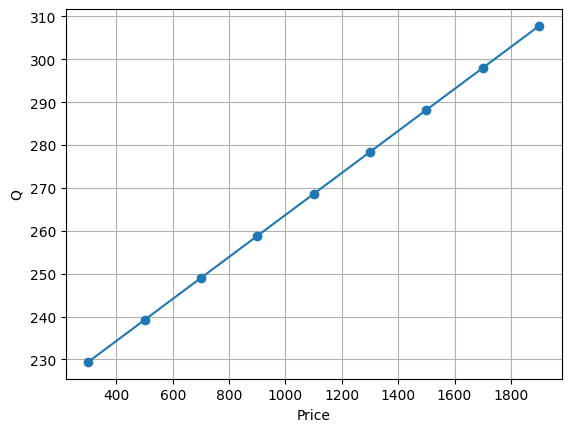

In [87]:
import matplotlib.pyplot as plt

plt.plot(price_range, predictions, marker='o', linestyle='-')
plt.xlabel('Price')
plt.ylabel('Q')
plt.grid()
plt.show()